In [476]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [477]:
import numpy as np
from matplotlib import pyplot as plt


In [478]:
from src.network import Network

In [479]:
from sklearn import datasets
from sklearn import cross_validation as cv
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

In [480]:
# https://github.com/torch/nn
# http://neuralnetworksanddeeplearning.com/chap1.html
# http://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
# https://theclevermachine.wordpress.com/2014/09/06/derivation-error-backpropagation-gradient-descent-for-neural-networks/

In [481]:
# cost_funcs = ('quadratic', 'cross-entropy', 'exponentional' )
# activation_func = ('sigmoid', 'hyperbolic tang', 'soft-max?')
# mode = ('online', 'batch', 'full-batch')

# Network(cost_func)
# add_input_layer(size)
# add_hidden_layer(size, activation_func)
# add_hidden_layer(size, activation_func)

In [482]:
iris = datasets.load_iris()

x_data = iris.data
label_binarizer = LabelBinarizer()
y_data = label_binarizer.fit_transform(iris.target)


x_train, x_data2, y_train, y_data2 = cv.train_test_split(x_data, y_data,
                                                       test_size=0.5, random_state=288)

x_train2, x_test, y_train2, y_test = cv.train_test_split(x_data2, y_data2,
                                                       test_size=0.4, random_state=288)

d_features = x_train.shape[1]
m_classes = len(label_binarizer.classes_)

In [483]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((75, 4), (75, 3), (30, 4), (30, 3))

In [484]:
sizes = [d_features, 10, m_classes]
act_funcs = ['logistic', 'softmax']
nn = Network(sizes, act_funcs, cost_func='multiclass_cross_entropy', epochs=100)

In [485]:
nn.fit(x_train, y_train, x_train2, y_train2)

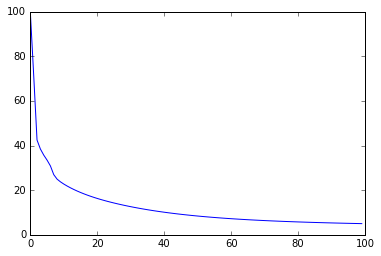

In [486]:
plt.plot(range(len(nn.scores)), nn.scores)

In [487]:
y_pred = nn.predict(x_test)
y_true = np.argmax(y_test, axis=1)

In [488]:
print metrics.precision_score(y_true, y_pred, average='macro')  

print metrics.recall_score(y_true, y_pred, average='micro')


print metrics.f1_score(y_true, y_pred, average='weighted')  

print metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)  

res = metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5, average=None)
print res[0]
print res[1]
print res[2]

0.962962962963
0.966666666667
0.966769865841
0.962450592885
[ 1.          1.          0.88888889]
[ 1.   0.9  1. ]
[ 1.          0.97826087  0.90909091]


In [489]:
multiclass_cross_entropy_cost_func(y_test, nn.predict_proba(x_test))

4.6390681356927033